In [1]:
import numpy as np
import math 
import random

In [6]:
patterns = []
classes = []

filename = 'normalized_data.txt'
file = open(filename,'r')

for line in file.readlines():
    row = line.strip().split(' ')
    patterns.append(row[0:])
    
file.close

patterns = np.asarray(patterns,dtype=np.float32)
print(str(patterns[int("16")]))

[ 0.243872 -0.009586 -0.469552 -0.356934 -0.454576  0.860927 -1.221758
 -0.678661 -0.916995  0.573963 -0.036462 -0.591796 -0.410743 -0.463287
 -0.198859 -0.525551 -2.628285]


In [8]:
patterns.shape

(8950, 17)

In [9]:
def mapunits(input_len,size='small'):
    heuristic_map_units = 5*input_len**0.54321
    if size == 'big':
        heuristic_map_units = 4*(heuristic_map_units)
    else:
        heuristic_map_units = 0.25*(heuristic_map_units)
    return heuristic_map_units

map_units = mapunits(len(patterns),size='big')
print("Heuristic computed appropriate no. of maps units: "+str(int(map_units)))

Heuristic computed appropriate no. of maps units: 2803


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def Eucli_dists(MAP,x):
    x = x.reshape((1,1,-1))
    #print(x)
    Eucli_MAP = MAP - x
    Eucli_MAP = Eucli_MAP**2
    Eucli_MAP = np.sqrt(np.sum(Eucli_MAP,2))
    return Eucli_MAP

input_dimensions = 17

map_width = 9
map_height = 5
MAP = np.random.uniform(size=(map_height,map_width,input_dimensions))
prev_MAP = np.zeros((map_height,map_width,input_dimensions))

radius0 = max(map_width,map_height)/2
learning_rate0 = 0.1

coordinate_map = np.zeros([map_height,map_width,2],dtype=np.int32)

for i in range(0,map_height):
    for j in range(0,map_width):
        coordinate_map[i][j] = [i,j]

epochs = 500
radius=radius0
learning_rate = learning_rate0
max_iterations = len(patterns)+1
too_many_iterations = 10*max_iterations

convergence = [1]

timestep=1
e=0.001 
flag=0

epoch=0
while epoch<epochs:
    
    shuffle = np.random.randint(len(patterns), size=len(patterns))
    for i in range(len(patterns)):
        
        # difference between prev_MAP and MAP
        J = np.linalg.norm(MAP - prev_MAP)
        #print(J)
        # J = || euclidean distance between previous MAP and current MAP  ||

        if  J <= e: #if converged (convergence criteria)
            flag=1
            break
            
        else:
            
            #if timestep == max_iterations and timestep != too_many_iterations:
            #    epochs += 1
            #    max_iterations = epochs*len(patterns)
            
            pattern = patterns[shuffle[i]]
            pattern_ary = np.tile(pattern, (map_height, map_width, 1))
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)
            
            # Get the best matching unit(BMU) which is the one with the smallest Euclidean distance
            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
            #BMU[1] = np.argmin(Eucli_MAP, 1)[int(BMU[0])]
    
            #Eucli_from_BMU = Eucli_dists(coordinate_map,BMU)  
        
            prev_MAP = np.copy(MAP)
             
            for i in range(map_height):
                for j in range(map_width):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= radius:
                        #theta = math.exp(-(distance**2)/(2*(radius**2)))
                        MAP[i][j] = MAP[i][j] + learning_rate*(pattern-MAP[i][j])
            
            learning_rate = learning_rate0*(1-(epoch/epochs))
            #time_constant = max_iterations/math.log(radius) 
            radius = radius0*math.exp(-epoch/epochs)
            #print([learning_rate, radius])
            
            timestep+=1
    
    if J < min(convergence):
        print('Lower error found: %s' %str(J) + ' at epoch: %s' % str(epoch))
        print('\tLearning rate: ' + str(learning_rate))
        print('\tNeighbourhood radius: ' + str(radius))
        MAP_final = MAP
    convergence.append(J)
    
    if flag==1:
        break
    epoch+=1


Lower error found: 0.9787299754273646 at epoch: 2
	Learning rate: 0.09960000000000001
	Neighbourhood radius: 4.482035952047962
Lower error found: 0.8797248221153144 at epoch: 3
	Learning rate: 0.0994
	Neighbourhood radius: 4.4730808382427085
Lower error found: 0.8437964402890092 at epoch: 21
	Learning rate: 0.0958
	Neighbourhood radius: 4.31491401257618
Lower error found: 0.5946333756612003 at epoch: 28
	Learning rate: 0.0944
	Neighbourhood radius: 4.254926111506784
Lower error found: 0.5441936859614029 at epoch: 82
	Learning rate: 0.08360000000000001
	Neighbourhood radius: 3.8193390984609303
Lower error found: 0.45465921670976794 at epoch: 91
	Learning rate: 0.08180000000000001
	Neighbourhood radius: 3.751206031870809
Lower error found: 0.4140635377749641 at epoch: 122
	Learning rate: 0.0756
	Neighbourhood radius: 3.5256943541828814
Lower error found: 0.3280238239922242 at epoch: 158
	Learning rate: 0.0684
	Neighbourhood radius: 3.2807675257543067
Lower error found: 0.2904502525176479

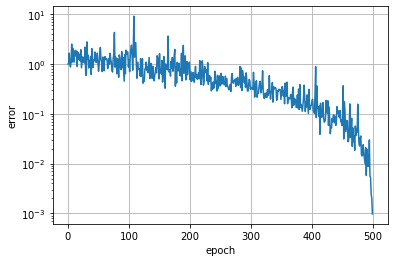

Number of timestamps: 4457249
Final Error: 0.0009720521823958177


In [14]:
plt.plot(convergence)
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Number of timestamps: '+str(timestep))
print('Final Error: '+str(J))